In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
GDP = pd.read_csv('./data/GDPA.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])

GDPCA = pd.read_csv('./data/GDPCA.csv')
GDPCA['DATE'] = pd.to_datetime(GDPCA['DATE'])

# GDP_per_capita = pd.read_csv('./data/GDPA_per_capita.csv')

PCE_index = pd.read_csv('./data/PCE_index.csv')
PCE_index.rename(columns={'DPCERG3A086NBEA': 'PCE'}, inplace=True)
PCE_index['DATE'] = pd.to_datetime(PCE_index['DATE'])


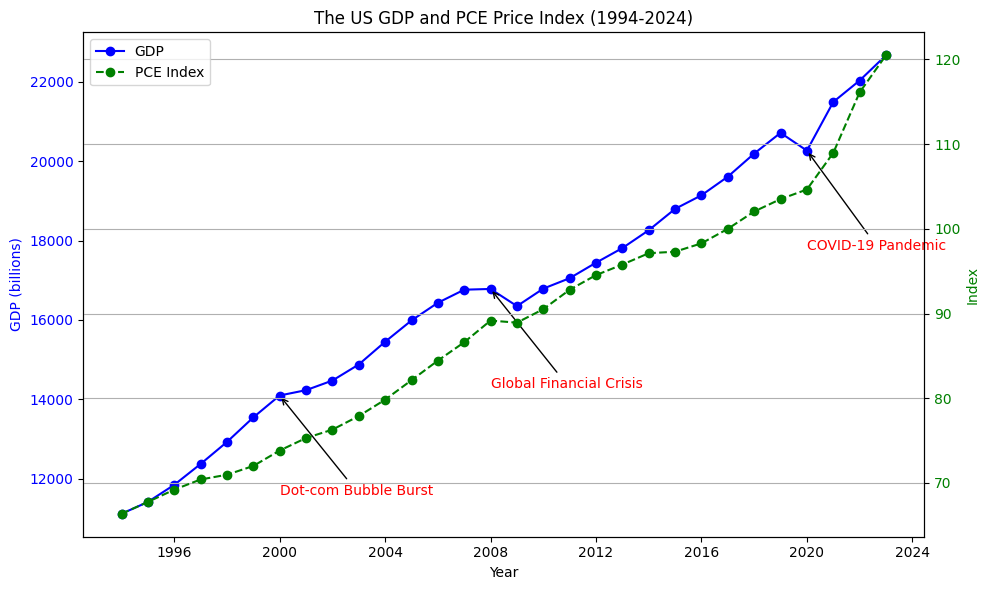

In [67]:
# This cell is for real GDP & PCE Index
GDPCA = GDPCA[GDPCA['DATE'] >= '1994-01-01']
PCE_index = PCE_index[PCE_index['DATE'] >= '1994-01-01']

events = {
    'Dot-com Bubble Burst': ('2000-01-01', 'Tech bubble collapse'),
    'Global Financial Crisis': ('2008-01-01', 'Financial crisis'),
    'COVID-19 Pandemic': ('2020-01-01', 'COVID-19 impact')
}

fig, ax1 = plt.subplots(figsize=(10,6))

# Real GDP
ax1.plot(GDPCA['DATE'], GDPCA['GDPCA'], label='GDP', color='blue', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (billions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# PCE Price Index
ax2 = ax1.twinx()
ax2.plot(PCE_index['DATE'], PCE_index['PCE'], label='PCE Index', color='green', linestyle='--', marker='o')
ax2.set_ylabel('Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

for event, (date, label) in events.items():
    date_dt = pd.to_datetime(date)
    if date_dt in GDPCA['DATE'].values:
        gdp_value = GDPCA[GDPCA['DATE'] == date_dt]['GDPCA'].values[0]
        ax1.annotate(event,
                     xy=(date_dt, gdp_value),
                     xytext=(date_dt, gdp_value - 2500),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10,
                     color='red')

plt.title('The US GDP and PCE Price Index (1994-2024)')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

lines = ax1.get_lines() + ax2.get_lines() 
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


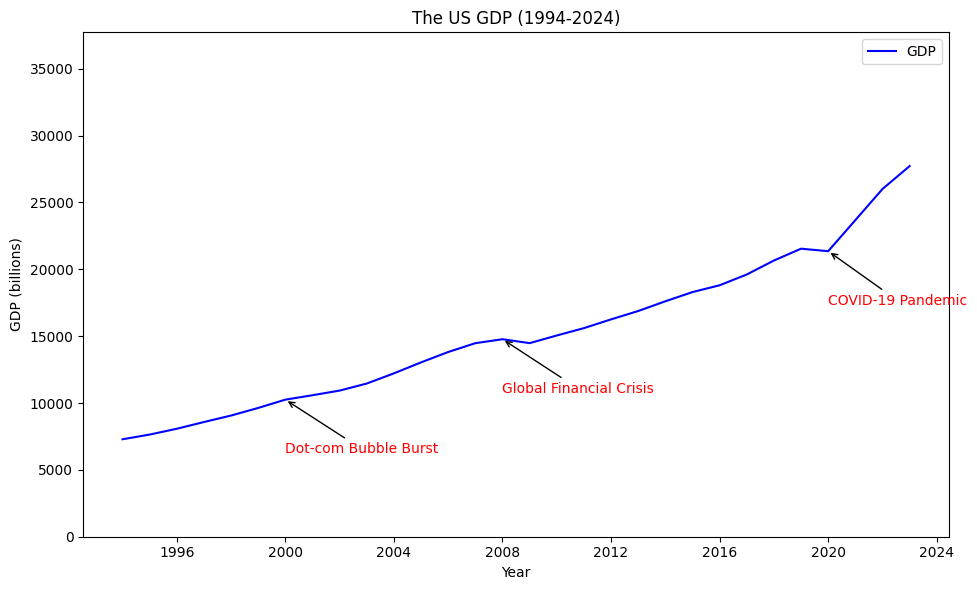

In [66]:
GDP = GDP[GDP['DATE'] >= '1994-01-01']

events = {
    'Dot-com Bubble Burst': ('2000-01-01', 'Tech bubble collapse'),
    'Global Financial Crisis': ('2008-01-01', 'Financial crisis'),
    'COVID-19 Pandemic': ('2020-01-01', 'COVID-19 impact')
}

plt.figure(figsize=(10, 6))
plt.plot(GDP['DATE'], GDP['GDPA'], label='GDP', color='blue')

for event, (date, label) in events.items():
    date_dt = pd.to_datetime(date)
    if date_dt in GDP['DATE'].values:
        gdp_value = GDP[GDP['DATE'] == date_dt]['GDPA'].values[0]
        plt.annotate(event,
                     xy=(date_dt, gdp_value),
                     xytext=(date_dt, gdp_value - 4000),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10,
                     color='red')

# Adjust y axis for misleading
plt.ylim(0, GDP['GDPA'].max() + 10000)

plt.title('The US GDP (1994-2024)')
plt.xlabel('Year')
plt.ylabel('GDP (billions)')

plt.legend()
plt.tight_layout()
plt.show()